In [ ]:
!pip install darts


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.4/819.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

# from category_encoders.ordinal import OrdinalEncoder

from darts import TimeSeries

from imblearn.under_sampling import NearMiss

from sklearn.tree import DecisionTreeClassifier


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay,
                             mean_absolute_error,
                             accuracy_score,
                             recall_score,
                             f1_score,
                             auc,
                             roc_auc_score, roc_curve, log_loss)



from sklearn.neighbors import (KNeighborsClassifier,
                               RadiusNeighborsClassifier)

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans, AgglomerativeClustering
# from hdbscan import HDBSCAN

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.cluster import pair_confusion_matrix

In [ ]:
df = pd.read_csv('T10Y2Y.csv')
df.head()

,DATE,T10Y2Y
0,2019-02-25,0.16
1,2019-02-26,0.16
2,2019-02-27,0.19
3,2019-02-28,0.21
4,2019-03-01,0.21


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    1305 non-null   object
 1   T10Y2Y  1305 non-null   object
dtypes: object(2)
memory usage: 20.5+ KB


In [ ]:
df['T10Y2Y'] = pd.to_numeric(df['T10Y2Y'], errors='coerce')
df['T10Y2Y'] = df['T10Y2Y'].fillna(method='ffill')
df['DATE'] = pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1305 non-null   datetime64[ns]
 1   T10Y2Y  1305 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.5 KB


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


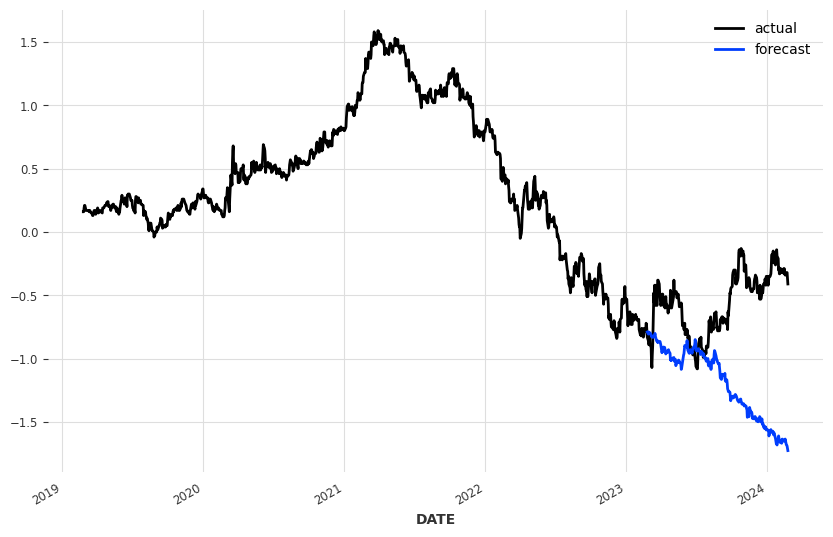

In [ ]:
series = TimeSeries.from_dataframe(df, 'DATE', 'T10Y2Y')
threshold = df['DATE'].quantile(0.8)


from darts.models import ExponentialSmoothing

train, test = series.split_before(threshold)

model = ExponentialSmoothing(seasonal_periods=297)
model.fit(train)
prediction = model.predict(len(test))

plt.figure(figsize=(10, 6))
series.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.show()

In [ ]:
df.rename(columns={"DATE": "ds", "T10Y2Y": "y"}, inplace=True)
train_size = int(len(df) * 0.8)
train_df, test_df = df[:train_size], df[train_size:]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1044 non-null   datetime64[ns]
 1   y       1044 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.4 KB


In [ ]:
from prophet import Prophet

prophet = Prophet()
prophet.fit(train_df)
future = prophet.make_future_dataframe(periods=len(test_df))
forecast = prophet.predict(future)
forecast.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ltswfh5/hb0nogpo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ltswfh5/0p53e4c3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23926', 'data', 'file=/tmp/tmp5ltswfh5/hb0nogpo.json', 'init=/tmp/tmp5ltswfh5/0p53e4c3.json', 'output', 'file=/tmp/tmp5ltswfh5/prophet_model_2wmubyu/prophet_model-20240228181343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:13:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:13:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-02-25,0.091249,-0.023586,0.182077,0.091249,0.091249,-0.012970,-0.012970,-0.012970,-0.012815,-0.012815,-0.012815,-0.000155,-0.000155,-0.000155,0.0,0.0,0.0,0.078279
1,2019-02-26,0.091806,-0.010230,0.190487,0.091806,0.091806,-0.005647,-0.005647,-0.005647,-0.011426,-0.011426,-0.011426,0.005780,0.005780,0.005780,0.0,0.0,0.0,0.086159
2,2019-02-27,0.092362,-0.011084,0.202832,0.092362,0.092362,-0.000163,-0.000163,-0.000163,-0.012019,-0.012019,-0.012019,0.011856,0.011856,0.011856,0.0,0.0,0.0,0.092199
3,2019-02-28,0.092918,-0.010765,0.198256,0.092918,0.092918,0.003272,0.003272,0.003272,-0.014737,-0.014737,-0.014737,0.018009,0.018009,0.018009,0.0,0.0,0.0,0.096190
4,2019-03-01,0.093474,-0.002653,0.210134,0.093474,0.093474,0.009114,0.009114,0.009114,-0.015061,-0.015061,-0.015061,0.024175,0.024175,0.024175,0.0,0.0,0.0,0.102588


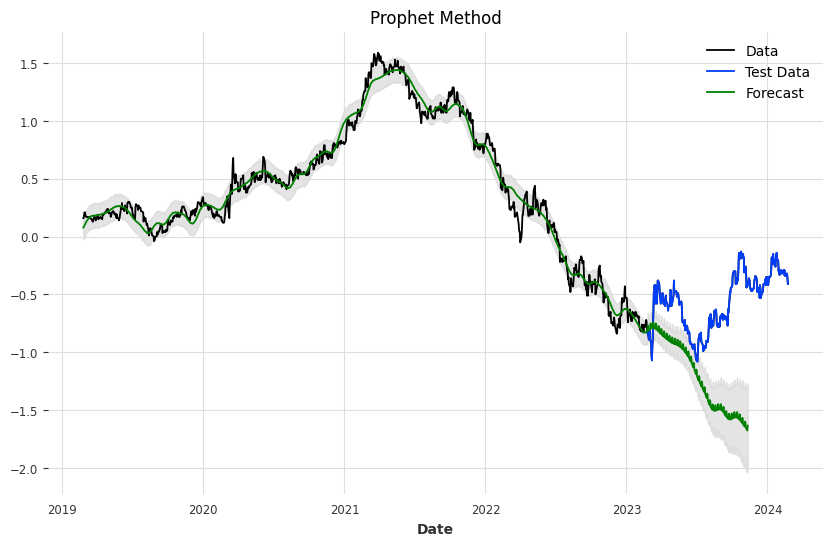

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Data')
plt.plot(test_df['ds'], test_df['y'], label='Test Data')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='green')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightgray', alpha=0.6)
plt.xlabel('Date')
plt.title('Prophet Method')
plt.legend()
plt.show()